# WeatherPy
----

### Analysis
* Looking at the first plot we confirm what is already commonly understood, cities closer to latitude zero are warmer than cities further away from the equator.
* Another important aspect of the first plot is that northen hemisphere is currently colder. Being that it is currently winter on the northern hemisphere temperatures there are generaly colder than those in similar latitudes on the southern hemisphere.
* Looking at the second plot I have to say that there is no correlation between cloudiness percentage and latitude. Plot is generally all over the place.
---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
#import api_keys
from config import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=150)
lngs = np.random.uniform(low=-180.000, high=180.000, size=150)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Total number of cities is {len(cities)}")
print(cities)

Total number of cities is 111
['miraflores', 'margate', 'busselton', 'port alfred', 'tiksi', 'cape town', 'lebu', 'balkanabat', 'luderitz', 'albany', 'voi', 'ushuaia', 'mahebourg', 'hilo', 'tuatapere', 'taolanaro', 'arman', 'punta arenas', 'vardo', 'victoria', 'bandarbeyla', 'avarua', 'port elizabeth', 'tuktoyaktuk', 'bereda', 'atuona', 'khatanga', 'east london', 'lima duarte', 'yellowknife', 'zhigansk', 'qaanaaq', 'puerto ayora', 'ixtapa', 'hermanus', 'kapaa', 'tasiilaq', 'rikitea', 'grenada', 'saint-philippe', 'bure', 'conceicao do araguaia', 'belushya guba', 'mys shmidta', 'attawapiskat', 'axim', 'bowen', 'romny', 'yerbogachen', 'williston', 'jurado', 'orocue', 'amderma', 'iqaluit', 'pointe michel', 'illoqqortoormiut', 'mount isa', 'tsihombe', 'ilulissat', 'neiafu', 'kruisfontein', 'vaini', 'mataura', 'trairi', 'siva', 'kuche', 'orlik', 'bengkulu', 'kloulklubed', 'haines junction', 'roma', 'mitsamiouli', 'mlade buky', 'pacific grove', 'barentsburg', 'saleaula', 'dali', 'hithadhoo', 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

ciudades = []
lat = []
temp = []
humid = []
clouds = []
winds = []


In [4]:
for city in cities:
    response = requests.get(query_url + city).json()
    if '404' in response.values():
        print(f"Sorry city of {city} not found, error 404")
    elif '500' in response.values():
        print("Internal error: 500001 , error 500")
    else:
        print(f"Getting weather data for city of {city}")
        ciudades.append(city)
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        winds.append(response['wind']['speed'])

Getting weather data for city of miraflores
Getting weather data for city of margate
Getting weather data for city of busselton
Getting weather data for city of port alfred
Getting weather data for city of tiksi
Getting weather data for city of cape town
Getting weather data for city of lebu
Getting weather data for city of balkanabat
Getting weather data for city of luderitz
Getting weather data for city of albany
Getting weather data for city of voi
Getting weather data for city of ushuaia
Getting weather data for city of mahebourg
Getting weather data for city of hilo
Getting weather data for city of tuatapere
Sorry city of taolanaro not found, error 404
Getting weather data for city of arman
Getting weather data for city of punta arenas
Getting weather data for city of vardo
Getting weather data for city of victoria
Getting weather data for city of bandarbeyla
Getting weather data for city of avarua
Getting weather data for city of port elizabeth
Getting weather data for city of tu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": ciudades,
    "latitude": lat,
    "temperature": temp,
    "humidity": humid,
    "cloudiness": clouds,
    "windspeed": winds
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,latitude,temperature,humidity,cloudiness,windspeed
0,miraflores,5.20,55.87,87,92,1.59
1,margate,-43.03,75.20,36,20,8.05
2,busselton,-33.64,64.19,100,0,5.84
3,port alfred,-33.59,67.03,92,48,9.53
4,tiksi,71.64,-34.14,61,76,3.38
5,cape town,-33.93,62.60,88,20,8.05
6,lebu,8.96,51.80,53,0,4.70
7,balkanabat,39.51,27.34,95,24,2.93
8,luderitz,-26.65,58.52,89,0,9.53
9,albany,42.65,21.47,59,75,16.11


In [6]:
weather_data.shape

(98, 6)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

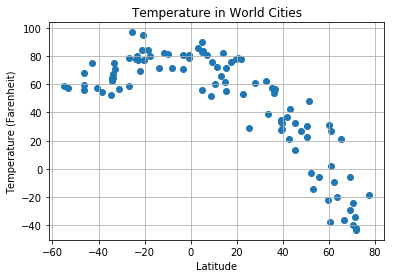

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("charts/TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

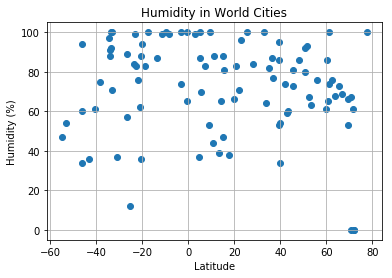

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("charts/HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

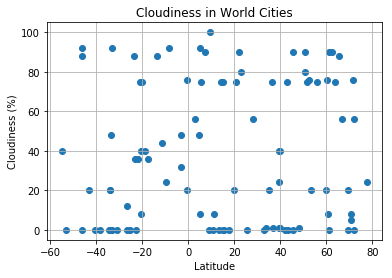

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("charts/CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

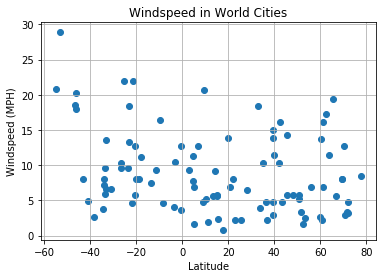

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("Windspeed in World Cities")
plt.ylabel("Windspeed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("charts/WindspeedInWorldCities.png")

# Show plot
plt.show()